# Multivariate Data
Data which has multiple variables and we want to show relation between these multiple variables

## We can use 2 ways to show these multivariate data
### 1. Facet Grids
### 2. Pair grids

## Lets load some data first

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('facebook-dataset.csv', sep=r"\s*;\s*", engine='python')
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## 1. Facetgrid
Facet grids are grid of plots where we give 1 dataframe as input and set X, Y and Hue. based on these values, it either create 1 plot where hue is shown as colors, or multiple plots as grid. 

#### Photos has a type column, which tells which type of post was it. we can create a facet grid based on the type column

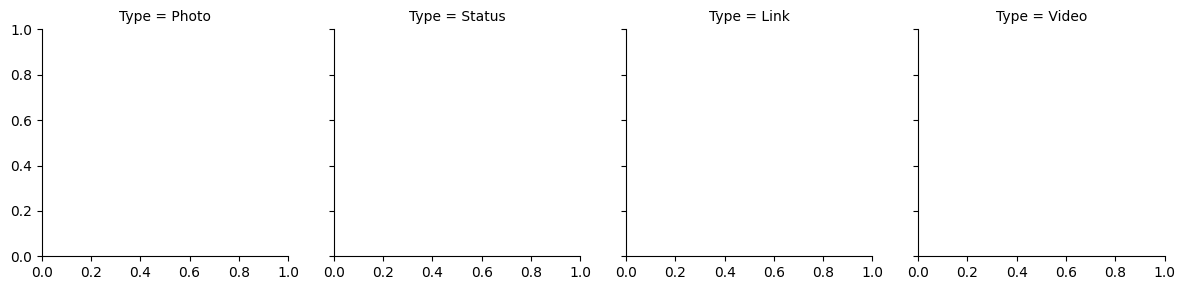

In [3]:
g = sns.FacetGrid(data=data, col='Type')

Now this has created 4 graphs, as there are 4 possible values of Column type

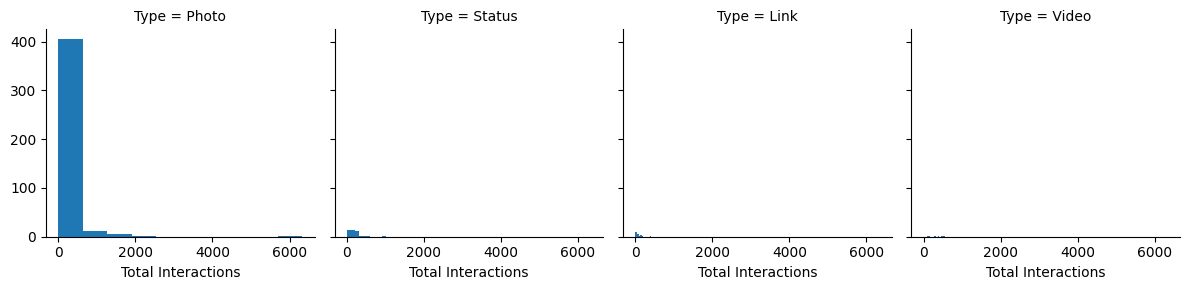

In [5]:
g = sns.FacetGrid(data=data, col='Type')
# We can create the plot using map method on facet grid
g.map(plt.hist, "Total Interactions") # Histogram for total interactions for each Type
plt.show()

Here we can see, Photo is most interacted post type. 

### Lets add another dimension
#### We can add hue to facet grid to show colors as another dimension
And Lets plot a scatter plot. Histogram is univariate, scatter plot can be used for bi-variate data

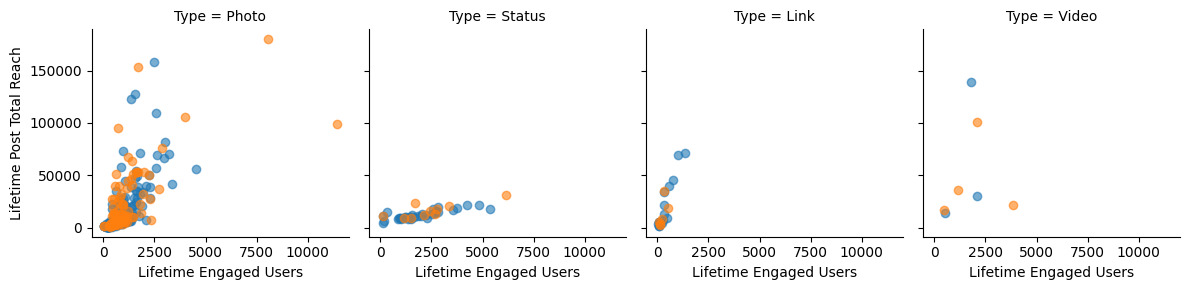

In [8]:
g = sns.FacetGrid(data=data, col='Type', hue='Paid')
g.map(plt.scatter, "Lifetime Engaged Users", "Lifetime Post Total Reach", alpha=0.6)
plt.show()

#### Lets add another dimension, Categories on Row

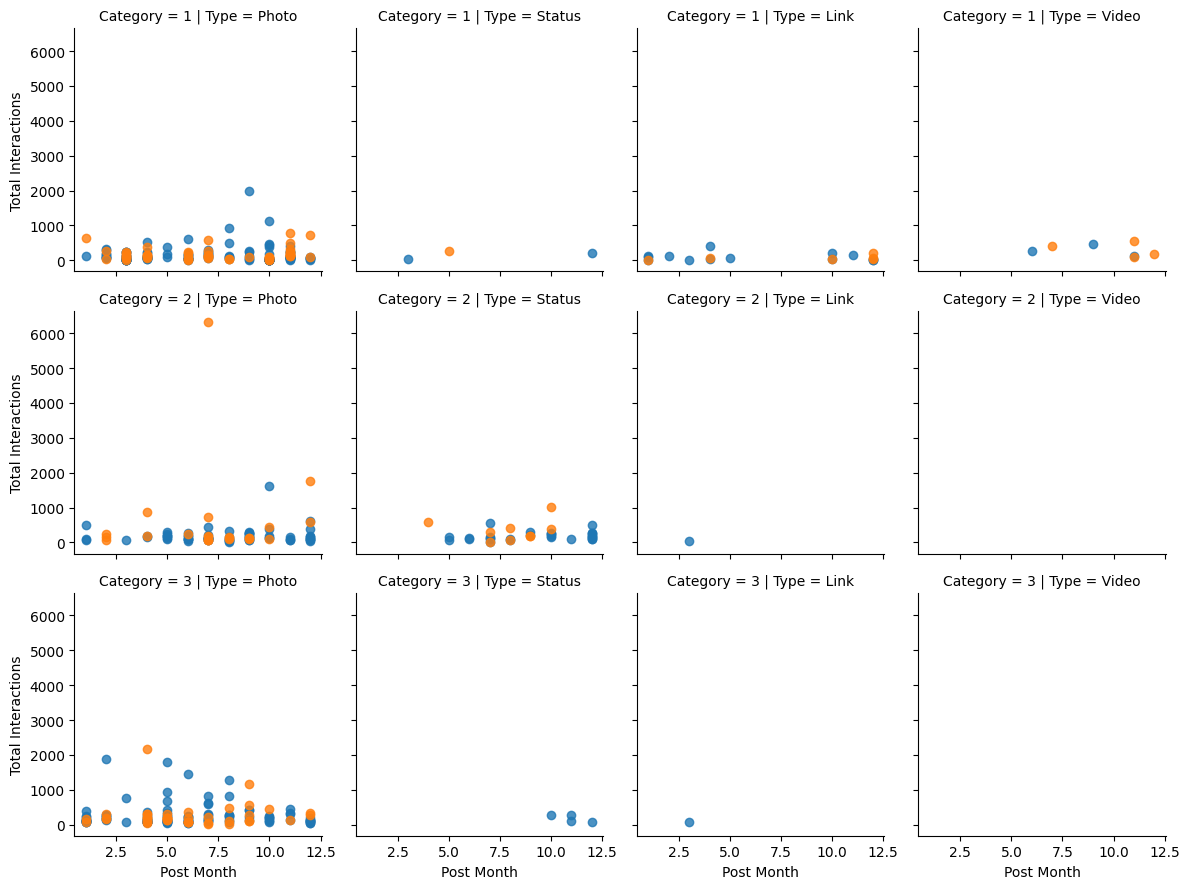

In [14]:
g = sns.FacetGrid(data=data, col='Type', hue='Paid', row='Category')

# And for each plot, lets show regression plot where between month and total interactions
g.map(sns.regplot, 'Post Month', 'Total Interactions', fit_reg=False)
plt.show()

#### Lets change the merkers and add legend

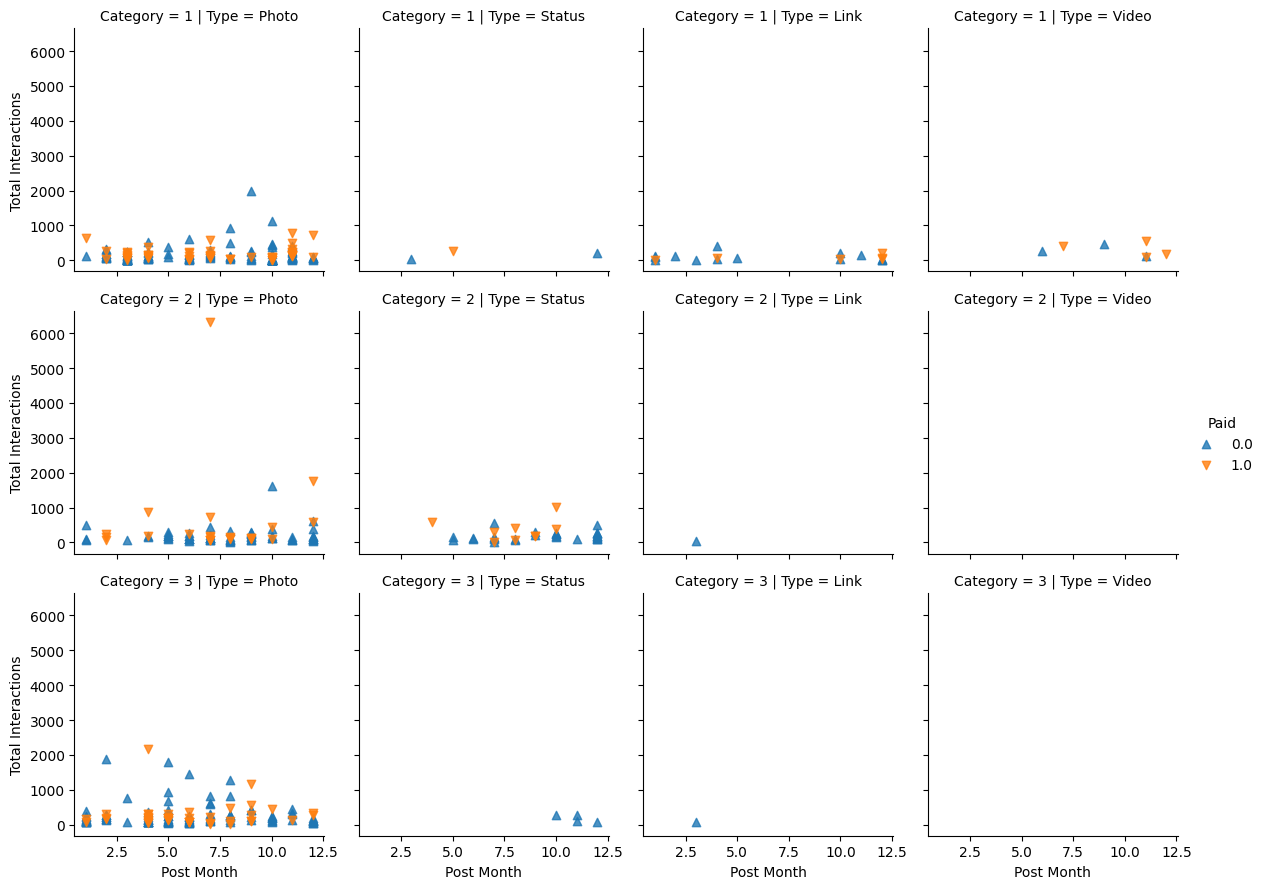

In [18]:
marker = {'marker': ['^', 'v']}

g = sns.FacetGrid(data=data, col='Type', hue='Paid', row='Category', hue_kws=marker)

# And for each plot, lets show regression plot where between month and total interactions
g.map(sns.regplot, 'Post Month', 'Total Interactions', fit_reg=False)
g.add_legend()
plt.show()

#### Lets change color of each hue marker

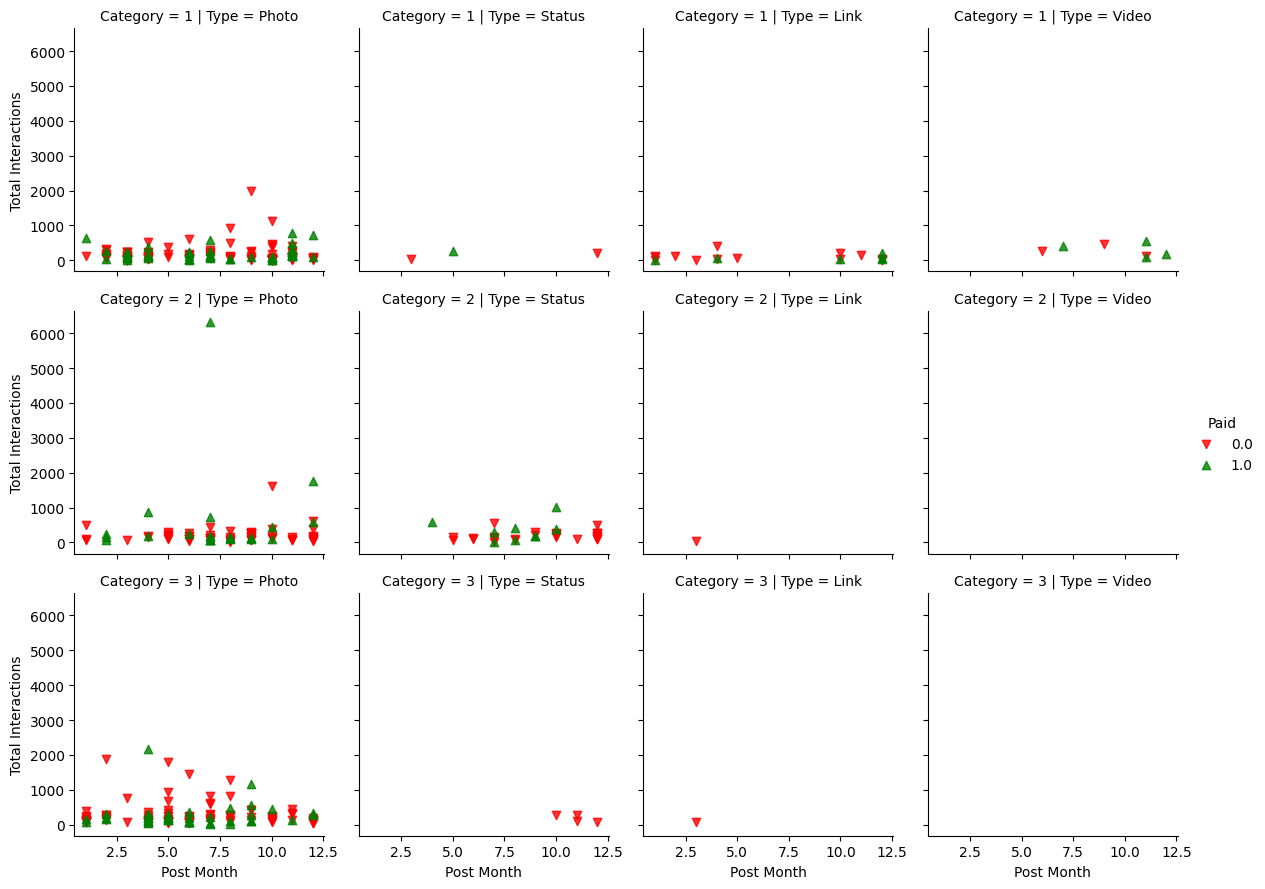

In [22]:
marker = {'marker': ['v', '^']}
colors = {0: 'red', 1:'green'}

g = sns.FacetGrid(data=data, col='Type', hue='Paid', row='Category', hue_kws=marker, palette=colors)

# And for each plot, lets show regression plot where between month and total interactions
g.map(sns.regplot, 'Post Month', 'Total Interactions', fit_reg=False)
g.add_legend()
plt.show()

### Lets try some bar plot on Facet grid

/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


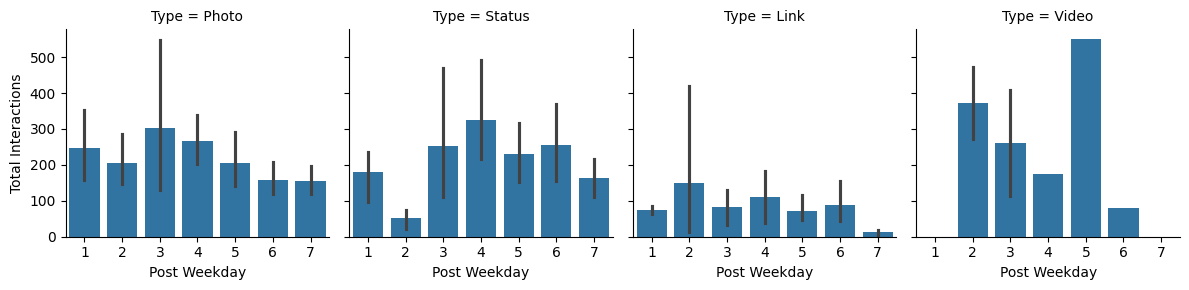

In [24]:
g = sns.FacetGrid(data=data, col='Type')
g.map(sns.barplot, 'Post Weekday', 'Total Interactions')
plt.show()

#### Lets Chose Post month as grid column

/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


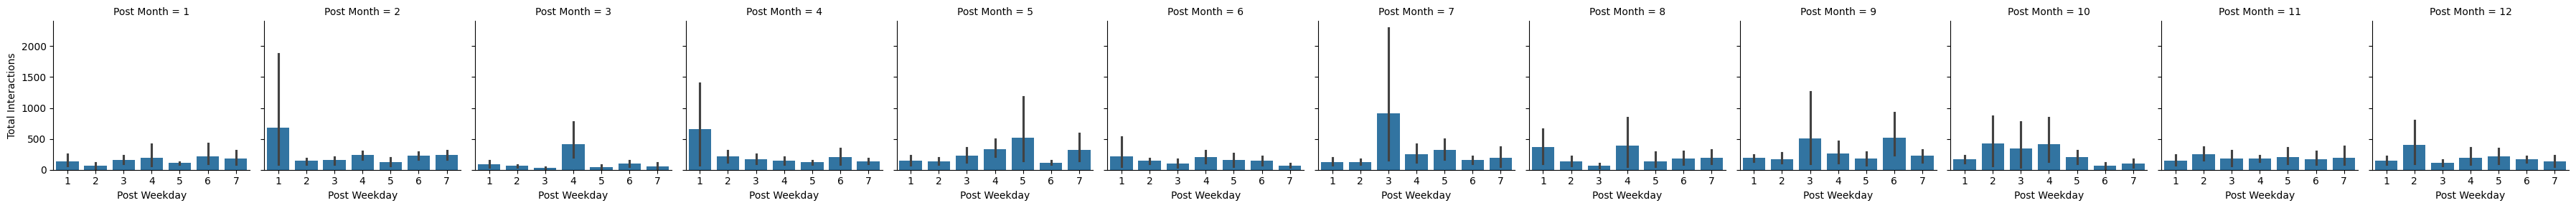

In [26]:
g = sns.FacetGrid(data=data, col='Post Month')
g.map(sns.barplot, 'Post Weekday', 'Total Interactions')
plt.show()

Now we can't see al graphs as they are in one line. To wrap the graphs, use col_wrap

/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


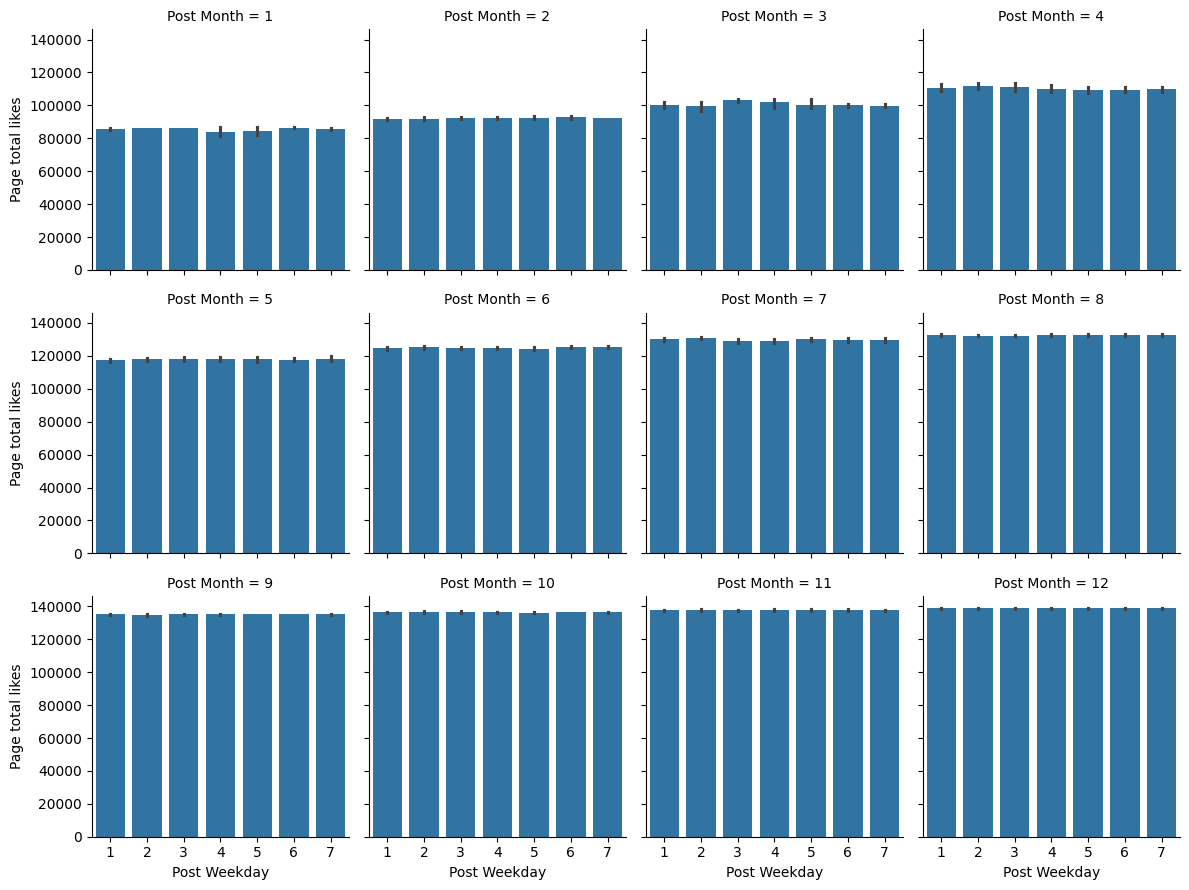

In [30]:
g = sns.FacetGrid(data=data, col='Post Month', col_wrap=4)
g.map(sns.barplot, 'Post Weekday', 'Page total likes')
plt.show()

### We can customize our facet grid using some matplotlib knowledge

/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


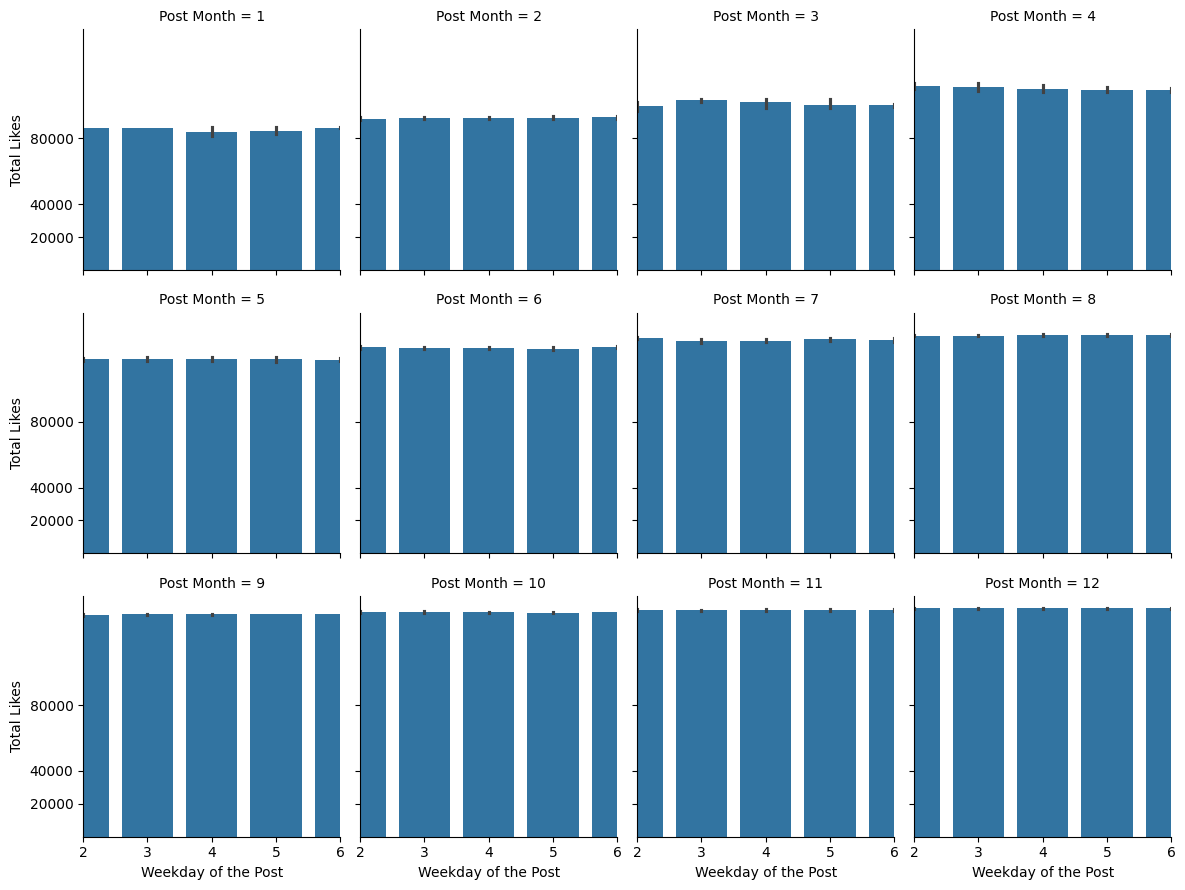

In [34]:
g = sns.FacetGrid(data=data, col='Post Month', col_wrap=4)
g.map(sns.barplot, 'Post Weekday', 'Page total likes')

# Set custom axes labels
g.set_axis_labels('Weekday of the Post', 'Total Likes')

# Set Tickers
g.set(yticks=[20000, 40000, 80000])

# Set Limits for graph zoomimg
g.set(xlim=(1,5))
plt.show()

## 2. Pair Grid
Pair grid is very similar to pair plot we have seen earlier where we plot relation between all combinations of variables 

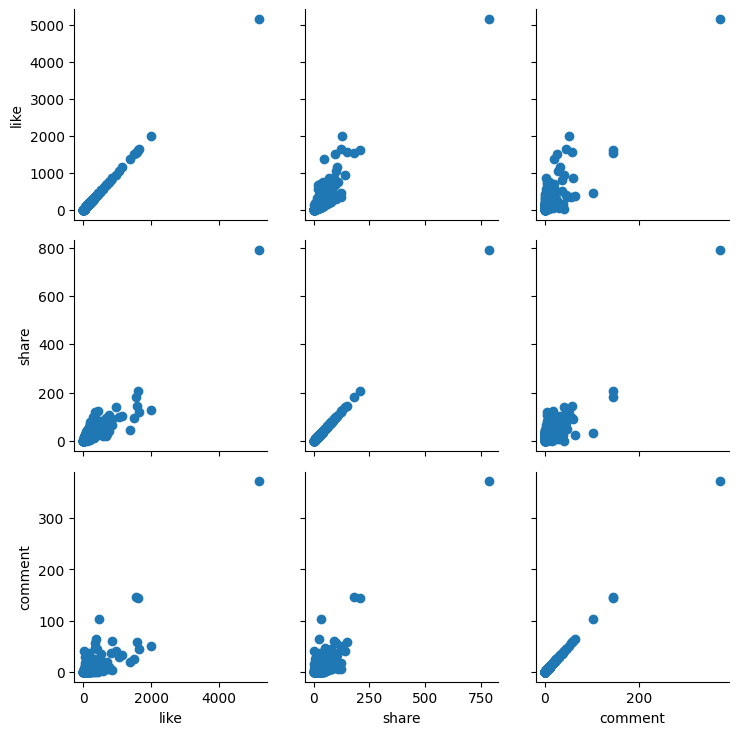

In [37]:
g=sns.PairGrid(data=data, vars=['like', 'share', 'comment'])
g.map(plt.scatter)

plt.show()

#### So we get scatter plots. But if you see diagonal, we will see straight lines, taht is because it is univariate data

Lets show kde plot on diagonal

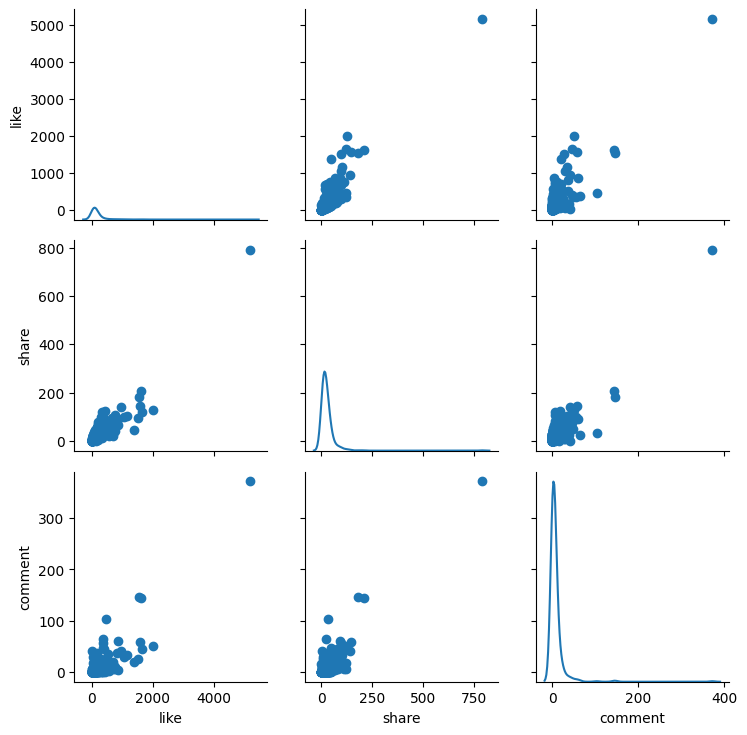

In [39]:
g=sns.PairGrid(data=data, vars=['like', 'share', 'comment'])

# Off Diagonal plots
g.map_offdiag(plt.scatter)

# Diagonal Plots
g.map_diag(sns.kdeplot)

plt.show()

### Lets add another dimension with hue

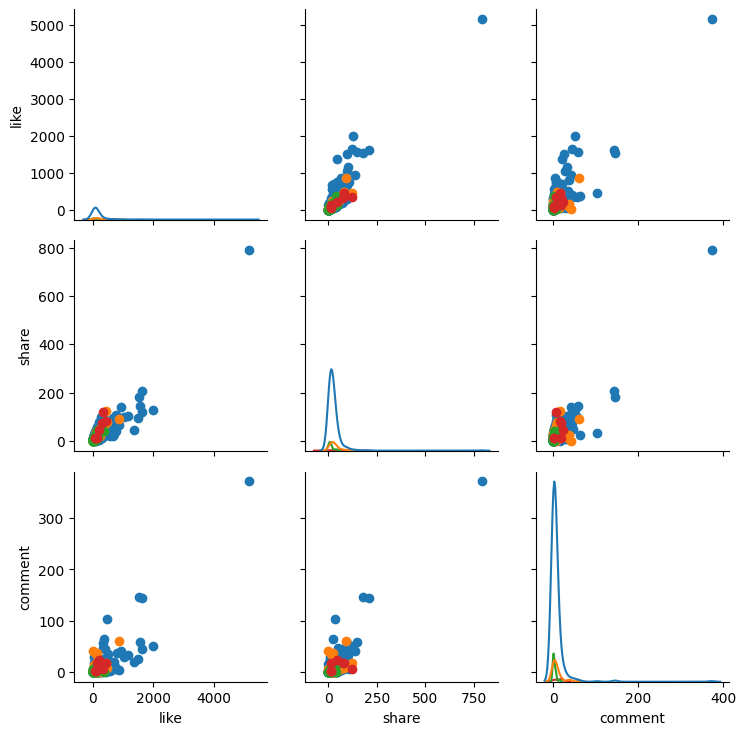

In [40]:
g=sns.PairGrid(data=data, vars=['like', 'share', 'comment'], hue='Type')

# Off Diagonal plots
g.map_offdiag(plt.scatter)

# Diagonal Plots
g.map_diag(sns.kdeplot)

plt.show()

But upper and lower plots of diagonal are showing same data, lets change their plot types

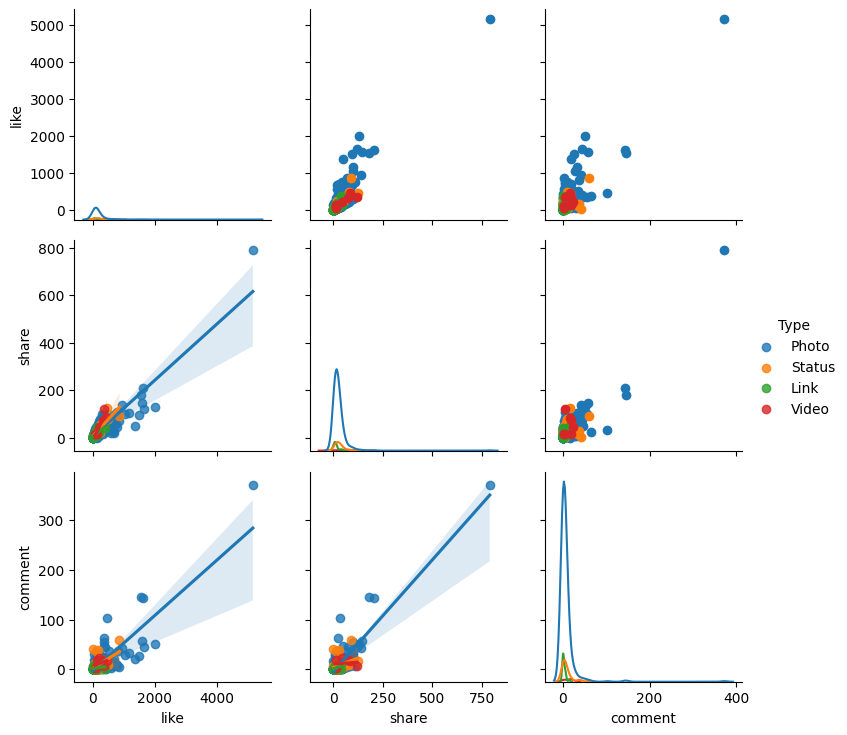

In [42]:
g=sns.PairGrid(data=data, vars=['like', 'share', 'comment'], hue='Type')

# Off Diagonal plots
g.map_upper(plt.scatter)
g.map_lower(sns.regplot)

# Diagonal Plots
g.map_diag(sns.kdeplot)

g.add_legend()

plt.show()

We can also specify different variables for x axis and y axis and get every combination of X and Y axis variables

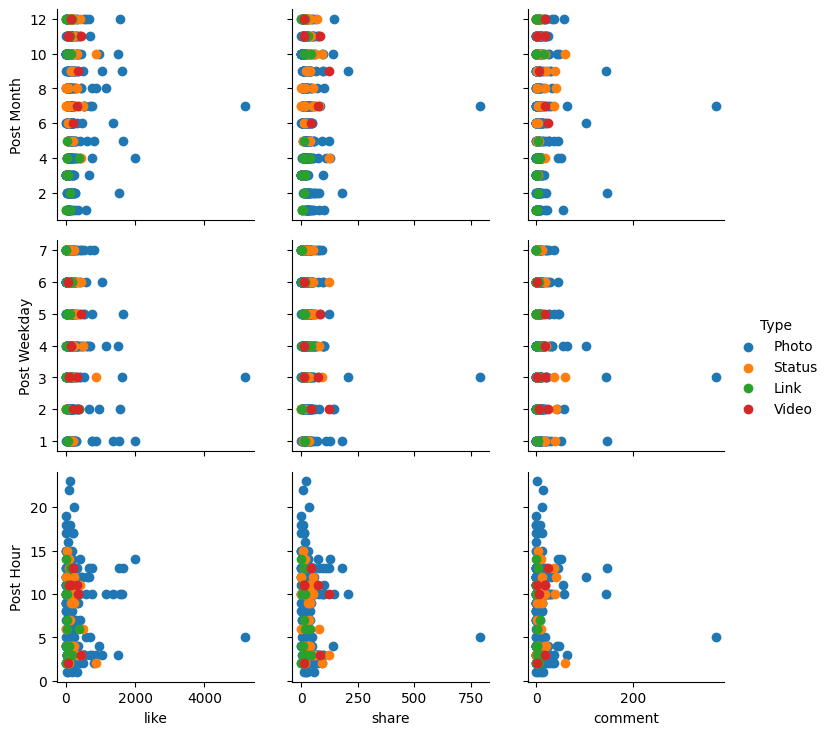

In [43]:
g=sns.PairGrid(data=data, x_vars=['like', 'share', 'comment'], y_vars=['Post Month', 'Post Weekday', 'Post Hour'], hue='Type')

g.map(plt.scatter)

g.add_legend()

plt.show()